<a href="https://colab.research.google.com/github/GiX007/agent-labs/blob/main/01_prompt_engineering/00_guidelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guidelines for Prompting


In this notebook, we'll practice two prompting principles and their related tactics in order to write effective prompts for large language models.

## Setup

#### Load the API key and relevant Python libaries.

This notebook utilizes the **OpenAI API** and is specifically configured to run on the **`gpt-4o-mini`** model (cheapest and most reliable model).

**Important:** The necessary `OPENAI_API_KEY` is loaded securely from the local `.env` file.

In [ ]:
import os
import openai
from dotenv import load_dotenv, find_dotenv

# Load the environment variables from the .env file
# Try to find .env automatically, fallback to common Colab path
dotenv_path = find_dotenv() or '/content/OPENAI_API_KEY.env'
load_dotenv(dotenv_path)

# Retrieve the key from the environment
openai_api_key = os.getenv('OPENAI_API_KEY')
# print(os.getenv('OPENAI_API_KEY'))

# Explicitly pass the key to the client constructor
client = openai.OpenAI(api_key=openai_api_key)

#### helper function
We will use OpenAI's **`gpt-4o-mini`** model and the [chat completions endpoint](https://platform.openai.com/docs/guides/chat).

This helper function will make it easier to use prompts and look at the generated outputs.

In [ ]:
# Define Models
gpt_4o_mini = "gpt-4o-mini" # best model regarding cost-effective work
gpt_35_turbo = "gpt-3.5-turbo" # use for comparison, if needed

In [ ]:
def get_completion(prompt, model=gpt_4o_mini):
    """
    Calls the OpenAI Chat Completion API with a single user prompt.

    Args:
        prompt (str): The user input prompt.
        model (str): The model name (e.g., "gpt-4o-mini" or "gpt-3.5-turbo").

    Returns:
        str: The content of the model's response.
    """
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

## Prompting Principles
- **Principle 1: Write clear and specific instructions**
- **Principle 2: Give the model time to “think”**

### Principle 1: Write clear and specific instructions

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

In [ ]:
text = f"""
You should express what you want a model to do by providing instructions that are as clear and specific as you can possibly make them. This will guide the model towards the desired output, and reduce the chances of receiving irrelevant or incorrect responses. Don't confuse writing a clear prompt with writing a short prompt. In many cases, longer prompts provide more clarity and context for the model, which can lead to more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

To achieve the desired output from a model, provide clear and specific instructions, as longer prompts often enhance clarity and context, leading to more relevant responses.


#### Tactic 2: Ask for a structured output
- JSON, HTML

In [ ]:
prompt = f"""
Generate a list of three made-up book titles along with their authors and genres.
Provide them in JSON format with the following keys: book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

```json
[
    {
        "book_id": 1,
        "title": "Whispers of the Forgotten Forest",
        "author": "Elena Moonshadow",
        "genre": "Fantasy"
    },
    {
        "book_id": 2,
        "title": "The Clockmaker's Secret",
        "author": "Jasper Thorne",
        "genre": "Mystery"
    },
    {
        "book_id": 3,
        "title": "Echoes of Tomorrow",
        "author": "Sophie Lark",
        "genre": "Science Fiction"
    }
]
```


#### Tactic 3: Ask the model to check whether conditions are satisfied

In [ ]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some water boiling. While that's happening, grab a cup and put a tea bag in it. Once the water is hot enough, just pour it over the tea bag. Let it sit for a bit so the tea can steep. After a \
few minutes, take out the tea bag. If you like, you can add some sugar or milk to taste. And that's it! You've got yourself a delicious cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Step 1 - Get some water boiling.  
Step 2 - Grab a cup and put a tea bag in it.  
Step 3 - Once the water is hot enough, pour it over the tea bag.  
Step 4 - Let it sit for a bit so the tea can steep.  
Step 5 - After a few minutes, take out the tea bag.  
Step 6 - If desired, add some sugar or milk to taste.  
Step 7 - Enjoy your delicious cup of tea!  


In [ ]:
text_2 = f"""
The sun is shining brightly today, and the birds are singing. It's a beautiful day to go for a walk in the park. The flowers are blooming, and the trees are swaying gently in the breeze. People are out and about, enjoying the lovely weather. Some are having picnics, while others are playing games or simply relaxing on the grass. It's a \
perfect day to spend time outdoors and appreciate the beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 2:
No steps provided.


#### Tactic 4: "Few-shot" prompting

In [ ]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest valley flows from a modest spring; the grandest symphony originates from a single note; the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

<grandparent>: The mighty oak stands tall after weathering countless storms; the phoenix rises anew from its ashes; the diamond, forged under immense pressure, shines brightest in the light.


### Principle 2: Give the model time to “think”

#### Tactic 1: Specify the steps required to complete a task

In [ ]:
text = f"""
In a charming village, siblings Jack and Jill set out on a quest to fetch water from a hilltop well. As they climbed, singing joyfully, misfortune struck—Jack tripped on a stone and tumbled down the hill, with Jill following suit. Though slightly battered, the pair returned home to comforting embraces. Despite the mishap, their adventurous spirits remained undimmed, and they continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions:
1 - Summarize the following text delimited by triple backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
Jack and Jill, siblings from a charming village, embarked on a quest for water but faced misfortune when Jack fell down a hill, yet they returned home undeterred and continued their adventures. 

Jack et Jill, des frères et sœurs d'un charmant village, se sont lancés dans une quête d'eau mais ont rencontré des malheurs lorsque Jack est tombé d'une colline, mais ils sont rentrés chez eux sans se décourager et ont continué leurs aventures.

Jack, Jill

{
  "french_summary": "Jack et Jill, des frères et sœurs d'un charmant village, se sont lancés dans une quête d'eau mais ont rencontré des malheurs lorsque Jack est tombé d'une colline, mais ils sont rentrés chez eux sans se décourager et ont continué leurs aventures.",
  "num_names": 2
}


#### Ask for output in a specified format

In [ ]:
prompt_2 = f"""
Your task is to perform the following actions:
1 - Summarize the following text delimited by <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)


Completion for prompt 2:
Summary: Siblings Jack and Jill embark on a joyful quest to fetch water but face a mishap when Jack falls down the hill, yet they return home undeterred and continue their adventures.  
Translation: Les frères et sœurs Jack et Jill se lancent dans une quête joyeuse pour chercher de l'eau, mais rencontrent un incident lorsque Jack tombe de la colline, pourtant ils rentrent chez eux sans se laisser décourager et poursuivent leurs aventures.  
Names: ["Jack", "Jill"]  
Output JSON: {"french_summary":"Les frères et sœurs Jack et Jill se lancent dans une quête joyeuse pour chercher de l'eau, mais rencontrent un incident lorsque Jack tombe de la colline, pourtant ils rentrent chez eux sans se laisser décourager et poursuivent leurs aventures.","num_names":2}


#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [ ]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, and an additional $10 / square foot
What is the total cost for the first year of operations as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

The student's solution is mostly correct, but there is a small error in the calculation of the maintenance cost. Let's break it down step by step.

1. **Land cost**: The cost of land is $100 per square foot, so for \( x \) square feet, the cost is:
   \[
   100x
   \]

2. **Solar panel cost**: The cost of solar panels is $250 per square foot, so for \( x \) square feet, the cost is:
   \[
   250x
   \]

3. **Maintenance cost**: The maintenance cost consists of a flat fee of $100,000 plus an additional $10 per square foot. Therefore, the maintenance cost for \( x \) square feet is:
   \[
   100,000 + 10x
   \]

Now, let's combine all these costs to find the total cost for the first year of operations:

\[
\text{Total cost} = \text{Land cost} + \text{Solar panel cost} + \text{Maintenance cost}
\]
\[
\text{Total cost} = 100x + 250x + (100,000 + 10x)
\]
\[
\text{Total cost} = 100x + 250x + 100,000 + 10x
\]
\[
\text{Total cost} = (100x + 250x + 10x) + 100,000
\]
\[
\text{Total cost} = 360x 

#### Note that the student's solution is actually not correct.
#### We can fix this by instructing the model to work out its own solution first.

In [ ]:
prompt = f"""
Your task is to determine if the student's solution is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem including the final total.
- Then compare your solution to the student's solution and evaluate if the student's solution is correct or not.
Don't decide if the student's solution is correct until you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, and an additional $10 / square foot
What is the total cost for the first year of operations as a function of the number of square feet.
```
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100 * x = 100x
2. Solar panel cost: 250 * x = 250x
3. Maintenance cost: 100,000 + 10 * x = 100,000 + 10x

Now, we sum these costs to find the total cost:
Total cost = Land cost + Solar panel cost + Maintenance cost
Total cost = 100x + 250x + (100,000 + 10x)
Total cost = 100x + 250x + 100,000 + 10x
Total cost = (100x + 250x + 10x) + 100,000
Total cost = 360x + 100,000

Thus, the total cost for the first year of operations as a function of the number of square feet is:
Total cost = 360x + 100,000
```
Is the student's solution the same as actual solution just calculated:
```
no
```
Student grade:
```
incorrect
```


## Model Limitations: Hallucinations
- Boie is a real company, the product name is not real.

In [ ]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie is a high-tech toothbrush designed to provide a superior cleaning experience. It features ultra-soft bristles that are gentle on the gums and teeth, while still effectively removing plaque and debris. The toothbrush also has a slim design that makes it easy to maneuver and reach all areas of the mouth.

One of the standout features of the AeroGlide UltraSlim Smart Toothbrush is its smart technology. It connects to a mobile app that tracks your brushing habits and provides personalized recommendations for improving your oral hygiene routine. The app also includes a timer and pressure sensor to ensure you are brushing for the recommended two minutes and not applying too much pressure.

Overall, the AeroGlide UltraSlim Smart Toothbrush by Boie is a sleek and innovative toothbrush that can help you achieve a cleaner and healthier smile.


## Experimenting more!

In [ ]:
prompt = f"""
Tell me about legendary Xai company by George Xydias
"""
response = get_completion(prompt)
print(response)

As of my last knowledge update in October 2023, there is no widely recognized company called "Xai" associated with George Xydias. It's possible that it could be a lesser-known or emerging company, or it may have gained prominence after my last update. 

If you have specific details or context about the company or its activities, I would be happy to help you with that information or provide insights based on what I know. Otherwise, I recommend checking the latest news sources or business directories for the most current information.


In [ ]:
prompt = f"""
Your task is: 1) search the web for any relevant information about Xai company by George Xydias and 2) based on this relevant information, tell me about Xai company by George Xydias
"""
response = get_completion(prompt)
print(response)

I'm unable to browse the web in real-time or access current information beyond my last training cut-off in October 2023. However, I can provide general guidance on how to find information about a company.

To learn about Xai company by George Xydias, you can:

1. **Search Engines**: Use search engines like Google to look for "Xai company George Xydias." This should yield articles, press releases, or official company websites.

2. **Business Directories**: Websites like LinkedIn, Crunchbase, or Bloomberg may have profiles on the company, including its mission, products, and key personnel.

3. **News Articles**: Look for news articles or press releases that mention the company. This can provide insights into recent developments, funding rounds, or partnerships.

4. **Social Media**: Check platforms like Twitter or Facebook for any official accounts related to the company, which may provide updates and insights.

5. **Industry Reports**: If Xai operates in a specific industry, industry re

The below image shows the results from running exactly the same prompts by using GPT-3.5 Turbo. We see that **the initial prompt caused GPT-3.5 Turbo to completely hallucinate detailed information about a non-existent company ("Xai company by George Xydias")**. This is contrasted by the subsequent responses (likely from a more advanced or search-augmented model) which correctly state that no relevant information could be found.

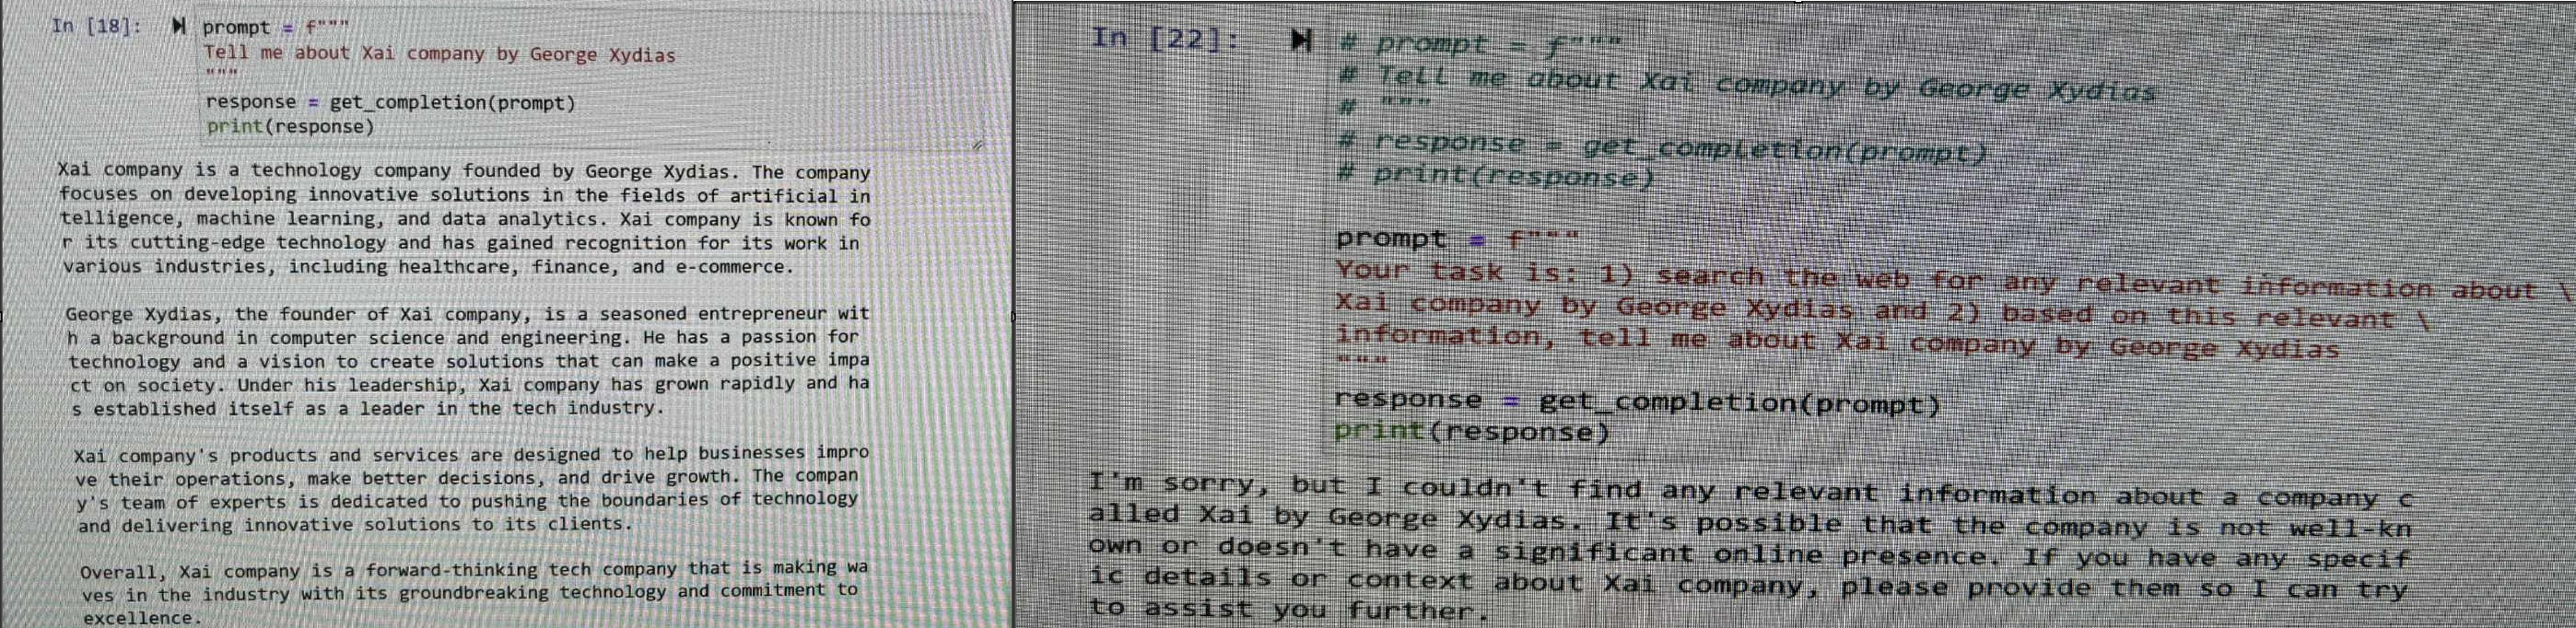

In [ ]:
from IPython.display import Image, display
display(Image('/content/hallucination.png'))

**The Lesson:** This case clearly demonstrates the risk of **hallucination** in LLMs, where the model prioritizes generating a fluent, confident answer over admitting a lack of knowledge. As one tries to build AI agentic applications, they must design verification steps into the workflows, often using Retrieval-Augmented Generation (RAG) or other factual checks, to prevent the agent from confidently acting on fabricated data.

#### Notes on using the OpenAI API

To install the OpenAI Python library:
```
!pip install openai
```

The library needs to be configured with your account's secret key, which is available on the [website](https://platform.openai.com/account/api-keys).

You can either set it as the `OPENAI_API_KEY` environment variable before using the library:
 ```
 !export OPENAI_API_KEY='sk-...'
 ```

Or, set `openai.api_key` to its value:

```
import openai
openai.api_key = "sk-..."
```